# 绘制PRD整体的气象要素贡献

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
filepath = datadir + 'Contribution/Seasonally/RandomForest_output/'
df = pd.read_excel(filepath + 'RF_PRD_merge.xlsx', index_col=0,header=[0])
df

,summer,autumn,Diff
SFC_TMP,0.806017,0.254294,0.118046
SOL_RAD,0.020192,0.387844,0.052964
QV,0.020537,0.148820,0.234424
PRES,0.066774,0.037180,0.220388
WSPD10,0.041460,0.064912,0.150115
WDIR10,0.023672,0.037890,0.110992
CloudFRAC,0.021348,0.069061,0.113070
mse,111.773941,212.979907,172.039013
r2,0.916475,0.868173,0.825737


In [3]:
variants = ['SFC_TMP', 'SOL_RAD', 'QV', 'PRES',
            'WSPD10', 'WDIR10', 'CloudFRAC']

df = df.loc[variants]

# 设置各要素对应的颜色
factor_color = {
    'SFC_TMP'  : '#ffbe7a',
    'SOL_RAD'  : '#e88482',
    'QV'       : '#82b0d2',
    'PRES'     : '#beb8dc',
    'WSPD10'   : '#45917c',
    'WDIR10'   : '#799a87',
    'CloudFRAC': '#c5b9a5'
}

In [4]:
df_avg = (df['summer'] + df['autumn'])/2
df_dif = (df['autumn'] - df['summer'])

df_avg.sort_values(ascending=True, inplace=True)
df_dif.sort_values(ascending=True, inplace=True)

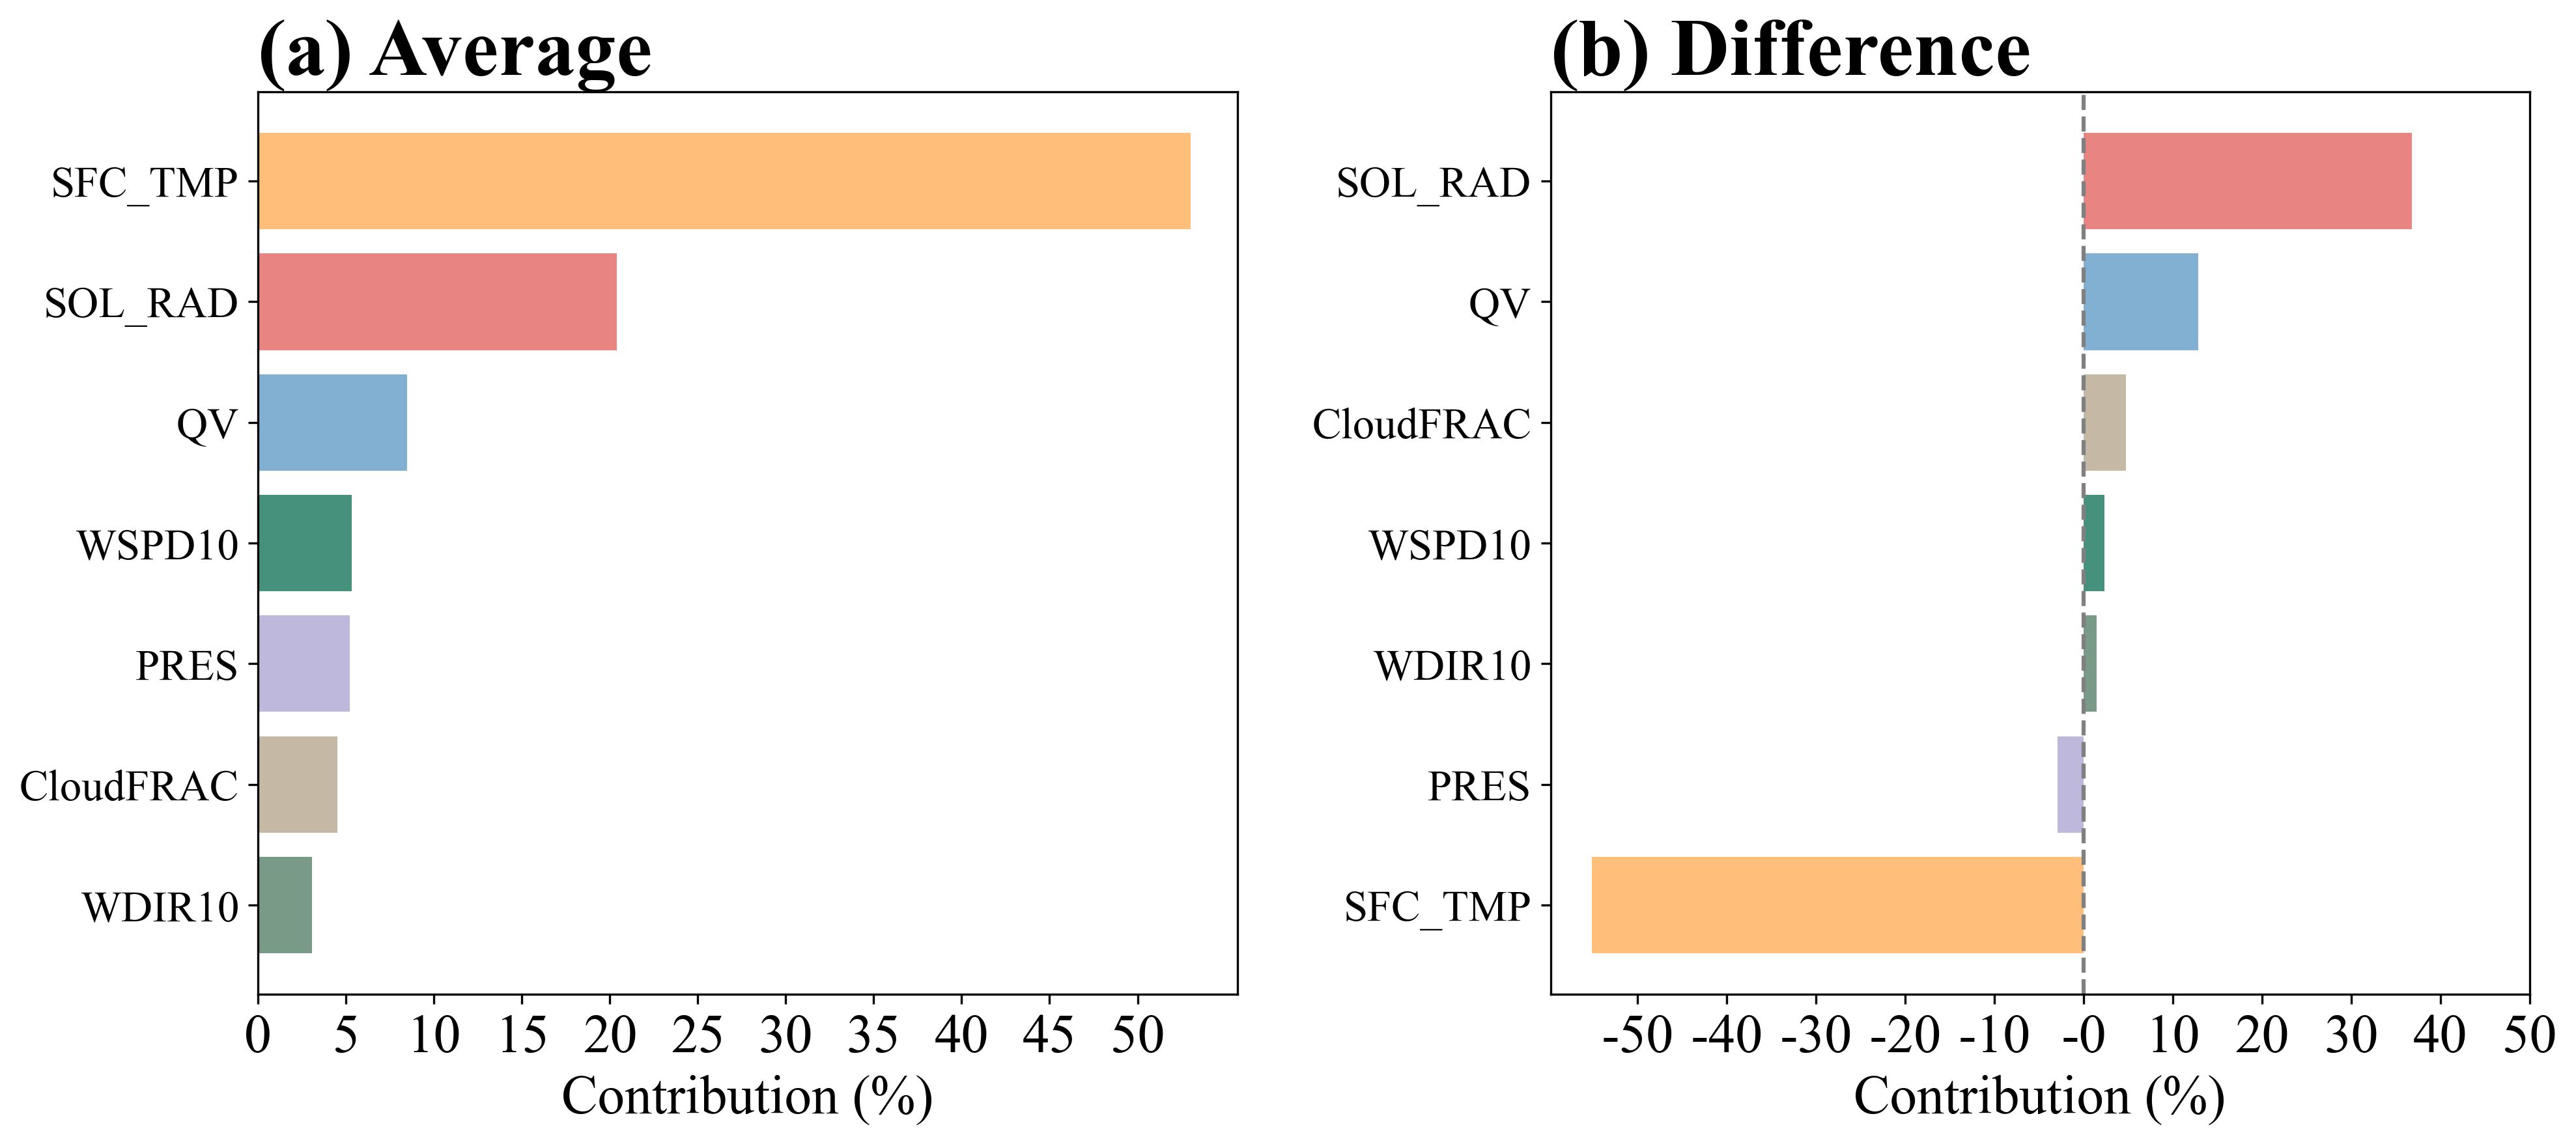

In [6]:
avg_colors = [factor_color[factor] for factor in df_avg.index]
dif_colors = [factor_color[factor] for factor in df_dif.index]

fig = plt.figure(figsize=(15, 6),dpi=300)
ax1,ax2 = fig.subplots(1,2)

ax1.barh(df_avg.index, df_avg, color=avg_colors)
xticks = np.arange(0, 0.51, 0.05)
ax1.set_xticks(xticks)
ax1.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks],fontsize=20)

ax2.barh(df_dif.index, df_dif, color=dif_colors)
ax2.axvline(x=0, color='gray', linestyle='--')
xticks = np.arange(-0.5, 0.51, 0.1)
ax2.set_xticks(xticks)
ax2.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks],fontsize=20)

ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=16)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=16)

ax1.set_xlabel('Contribution (%)', fontsize=20)
ax2.set_xlabel('Contribution (%)', fontsize=20)

title_dict={'fontsize':30,'fontweight':'bold','loc':'left'}
ax1.set_title('(a) Average',**title_dict)
ax2.set_title('(b) Difference',**title_dict)
plt.subplots_adjust(wspace=0.32)
plt.show()

## 同时展示summer和autumn

In [7]:
summer = df['summer'].copy()
summer.sort_values(ascending=True, inplace=True)
autumn = df['autumn'].copy()
autumn.sort_values(ascending=True, inplace=True)

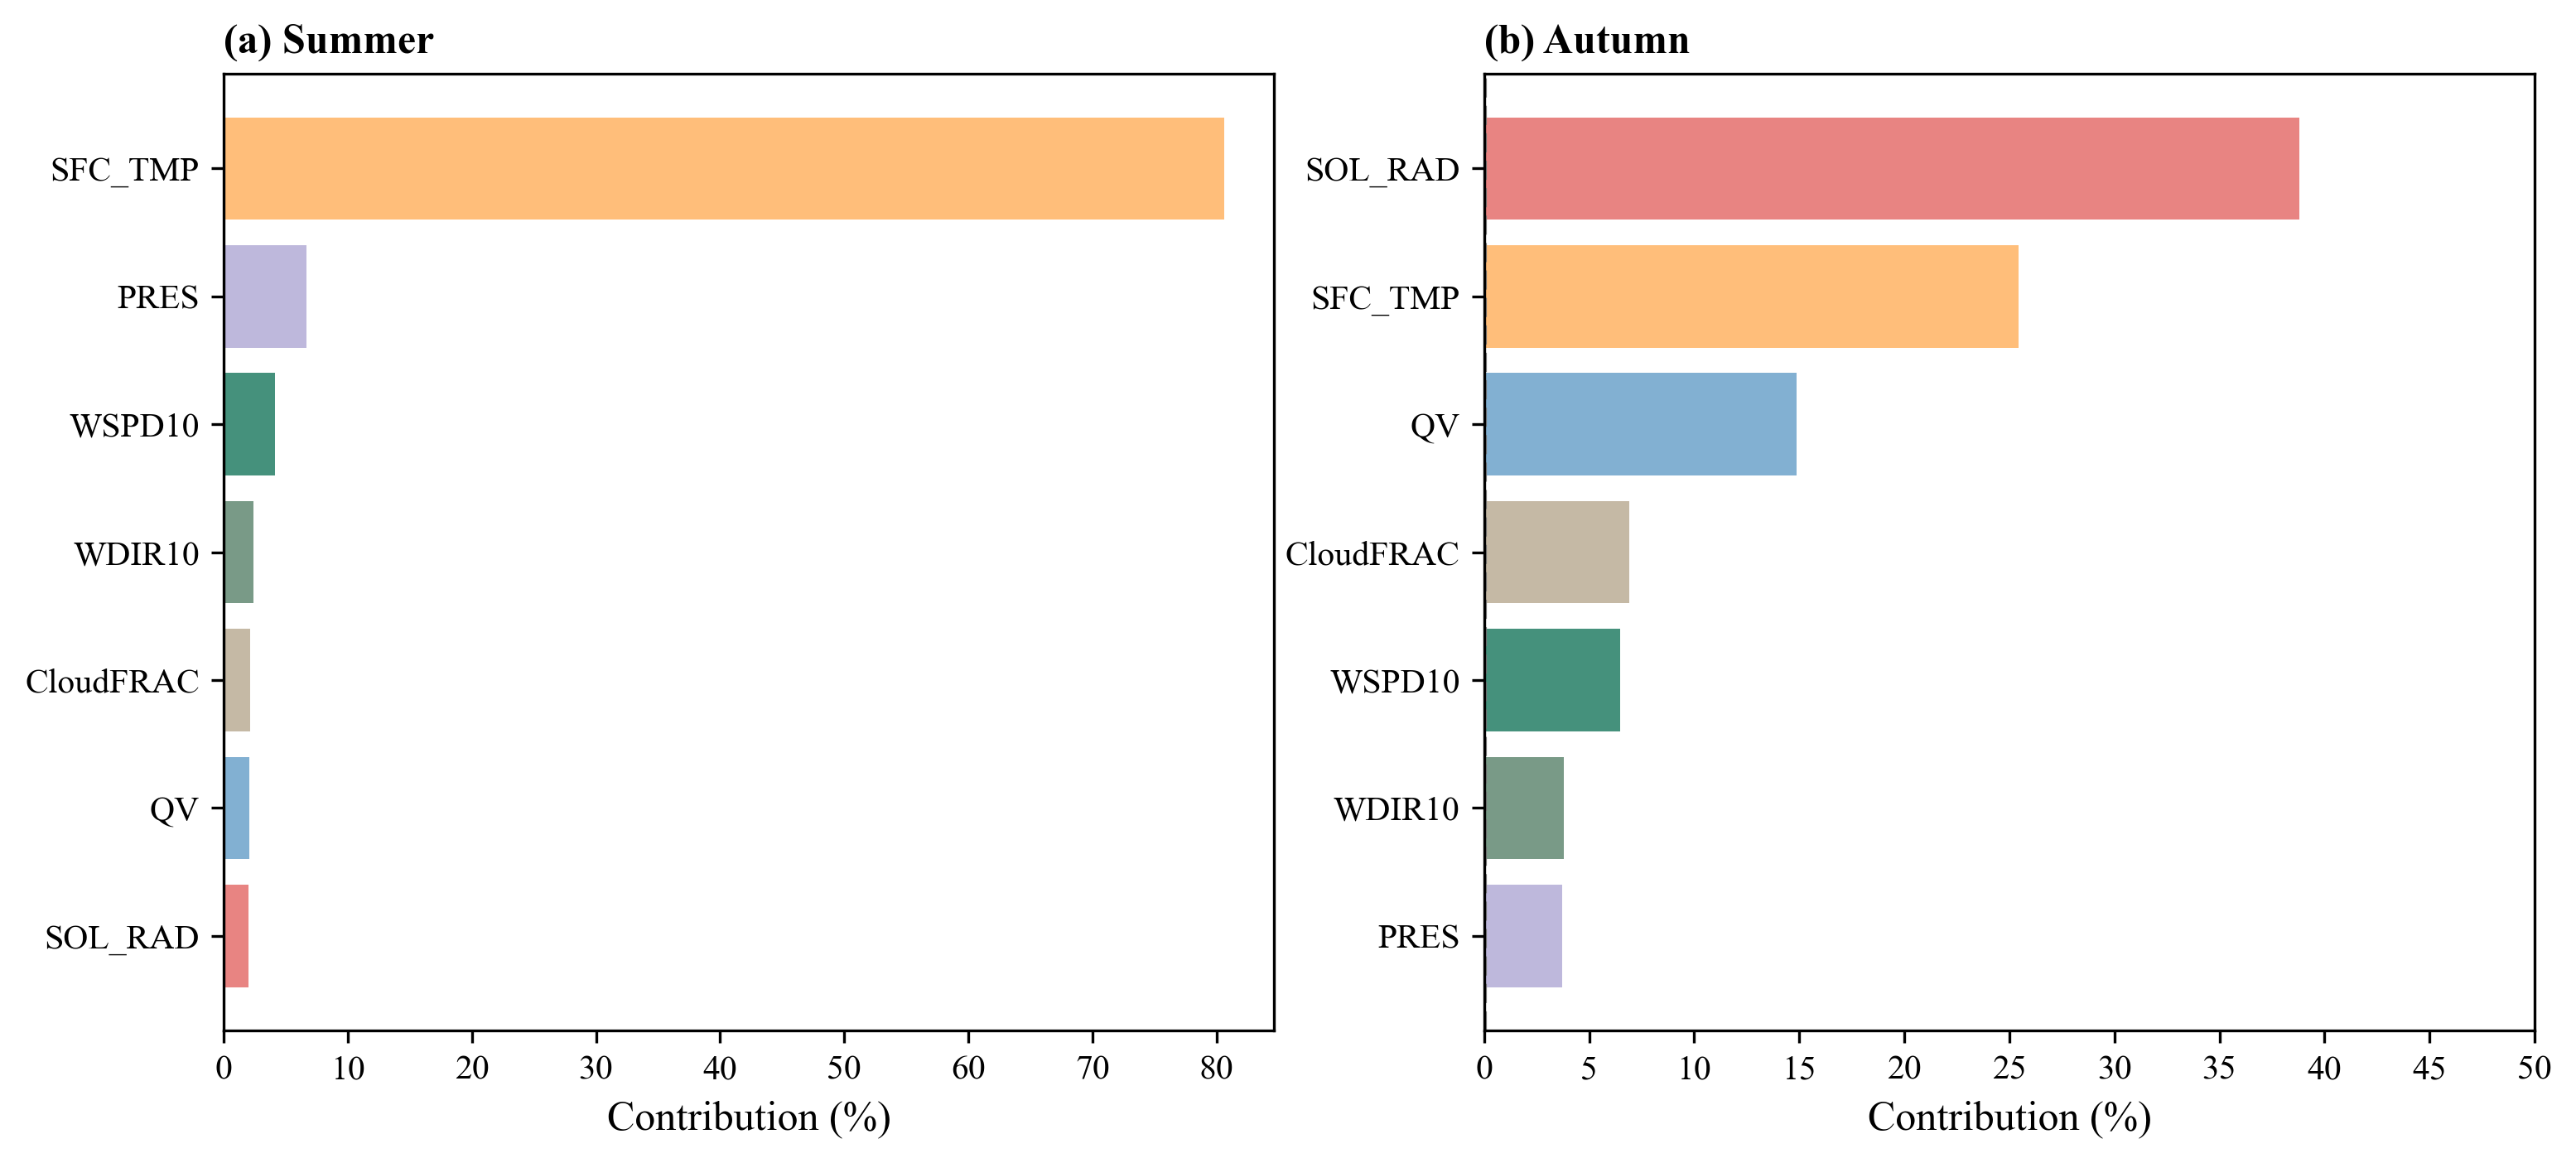

In [8]:
avg_colors = [factor_color[factor] for factor in summer.index]
dif_colors = [factor_color[factor] for factor in autumn.index]

fig = plt.figure(figsize=(12, 5),dpi=300)
ax1,ax2 = fig.subplots(1,2)

ax1.barh(summer.index, summer, color=avg_colors)
xticks = np.arange(0, 0.81, 0.1)
ax1.set_xticks(xticks)
ax1.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks])

ax2.barh(autumn.index, autumn, color=dif_colors)
ax2.axvline(x=0, color='gray', linestyle='--')
xticks = np.arange(0, 0.51, 0.05)
ax2.set_xticks(xticks)
ax2.set_xticklabels(['{:.0f}'.format(x*100) for x in xticks])

ax1.set_xlabel('Contribution (%)', fontsize=12)
ax2.set_xlabel('Contribution (%)', fontsize=12)

title_dict={'fontsize':12,'fontweight':'bold','loc':'left'}
ax1.set_title('(a) Summer',**title_dict)
ax2.set_title('(b) Autumn',**title_dict)
plt.show()